In [1]:
# This model is developed using Logistic Regression algorithm to predict the passengers survived in the Titanic Shipwreck.
# Dataset is downloaded from Kaggle website.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
# load data set
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Remove all not necessary columns
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True, axis=1)
df_test.drop([ 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True, axis=1)

In [5]:
# Print the Train and Test data columns
print(df_train.columns)
print(df_test.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [6]:
# combine both train and test data so that it will be easy for data cleaning
df = pd.concat([df_train, df_test],sort = True)

# Data Cleaning 

In [7]:
# check missing value
df.isna().sum()

Age            263
Fare             1
Parch            0
PassengerId    891
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64

In [8]:
# Fill the missing values with median for Age
df[df.Age.isna()]
df.Age = df.Age.fillna(df.Age.median())

# deal with NA in Fare
df[df.Fare.isna()]
# it is a 3rd class passenger and there is strongly relationship between Fare and Class,so I use the mean(Fare) in 3th class to replace the missing value
df.Fare = df.Fare.fillna(df.Fare[df.Pclass ==3].median())

In [9]:
# update the df_train
df_train.Age = df.Age[0:len(df_train)]
df_train.Fare = df.Fare[0:len(df_train)]
df_test.Age = df.Age[0:len(df_test)]
df_test.Fare = df.Fare[0:len(df_test)]

# EDA

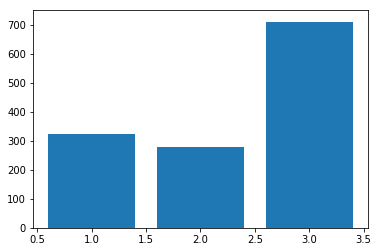

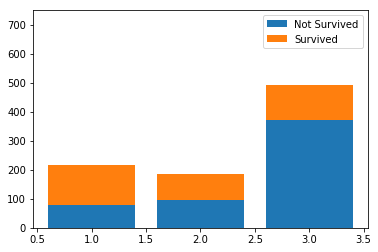

In [10]:
# Pclass
ind = list(set(df.Pclass))
count = df.groupby("Pclass").count().Sex
count0 = df_train[df_train.Survived == 0].groupby("Pclass").count().Sex
count1 = df_train[df_train.Survived == 1].groupby("Pclass").count().Sex

# distrubition
plt.bar(ind, count)
plt.ylim(0,750)
plt.show()

# relationship
p0 = plt.bar(ind, count0)
p1 = plt.bar(ind, count1, bottom = count0)
plt.ylim(0,750)
plt.legend((p0[0], p1[0]), ('Not Survived','Survived'))
plt.show()

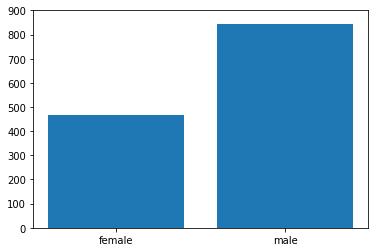

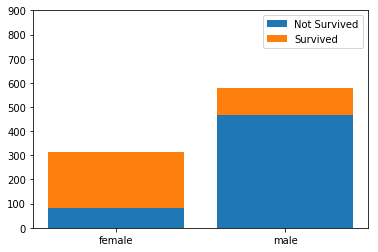

In [11]:
# Sex
ind = sorted(list(set(df.Sex)))
count = df.groupby("Sex").count().Pclass
count0 = df_train[df_train.Survived == 0].groupby("Sex").count().Survived
count1 = df_train[df_train.Survived == 1].groupby("Sex").count().Survived

# distrubition
plt.bar(ind, count)
plt.ylim(0,900)
plt.show()

# relationship
p0 = plt.bar(ind, count0)
p1 = plt.bar(ind, count1, bottom = count0)
plt.ylim(0,900)
plt.legend((p0[0], p1[0]), ('Not Survived','Survived'))
plt.show()

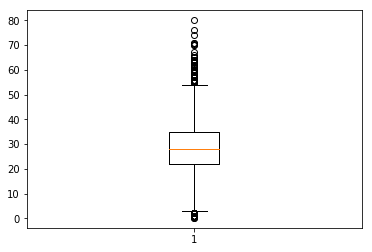

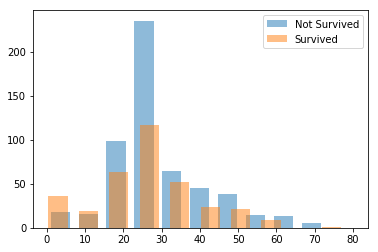

In [12]:
# Age
#distribution
plt.boxplot(df.Age)
plt.show()

#relationship
p0 = plt.hist(df_train.Age[df_train.Survived == 0], width = 5, alpha = 0.5)
p1 = plt.hist(df_train.Age[df_train.Survived == 1], width = 5, alpha = 0.5)
plt.legend(('Not Survived','Survived'))
plt.show()

# Feature Engineering

In [13]:
genderMap={
    'male':0,
    'female':1
}

df_train.Sex= df_train.Sex.map(genderMap)
df_test.Sex= df_test.Sex.map(genderMap)

In [14]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [15]:
# Standardizing the features:

#sc = StandardScaler()
#sc.fit(df_train)
#df_train_std = sc.transform(df_train)
#df_test_std = sc.transform(df_test)

In [16]:
X = df_train.drop('Survived', axis = 1)
y = df_train['Survived']

In [17]:
#Train and Test data split using scikit learn
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
# Standardizing the features:

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [20]:
# Training a logistic regression model with scikit-learn
lr=LogisticRegression(solver='lbfgs',multi_class='ovr',C=1,random_state=31)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=31, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# Predict using test data
lr.predict(X_test_std).reshape(-1,1)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [22]:
# Print the Accuracy of the model
score = lr.score(X_test_std,y_test)
print (score)

0.7982062780269058


In [23]:
df_test['Survived'] = lr.predict(df_test.drop(['PassengerId'],axis=1))

In [24]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,892,3,0,22.0,0,0,7.2500,0
1,893,3,1,38.0,1,0,71.2833,0
2,894,2,0,26.0,0,0,7.9250,0
3,895,3,0,35.0,0,0,53.1000,0
4,896,3,1,35.0,1,1,8.0500,0


In [25]:
res = df_test[['PassengerId', 'Survived']]
res.set_index('PassengerId', inplace = True)

In [26]:
res.to_csv('gender_submission.csv')